In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def clean_data(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_')
    df['Activity_Period'] = pd.to_datetime(df['Activity_Period'], format='%Y%m', errors='coerce')
    return df


In [114]:
def create_visualizations(airline_passengers, time_trends, terminal_passengers):
    sns.set_theme(style="whitegrid")

    # Bar Chart: Total Passengers by Airline
    plt.figure(figsize=(16, 9))
    airline_passengers.plot(kind='bar', color=['crimson', 'cyan', 'purple', 'blue', 'green'])
    plt.title('Total Passengers by Airline', fontsize=16)
    plt.xlabel('Airline')
    plt.ylabel('Passenger Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("Total Passengers.png")
    plt.show()

    # Line Chart: Passenger Trends Over Time
    plt.figure(figsize=(16, 9))
    time_trends.plot(kind='line', marker='o', color='purple')
    plt.title('Passenger Trends Over Time', fontsize=16)
    plt.xlabel('Activity Period')
    plt.ylabel('Passenger Count')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("Passengers Trends.png")
    plt.show()

    # Bar Chart: Passenger Count by Terminal
    plt.figure(figsize=(16, 9))
    terminal_passengers.plot(kind='bar', color=['crimson', 'cyan', 'purple', 'blue', 'green'])
    plt.title('Passenger Count by Terminal', fontsize=16)
    plt.xlabel('Terminal')
    plt.ylabel('Passenger Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("Passengers Count Terminal.png")
    plt.show()



In [115]:
def create_visualizations_airline(geo_summary, time_trends, Month, ticket_price):
    sns.set_theme(style="whitegrid")

    # Line Chart: Passenger Trends Over Time
    plt.figure(figsize=(16, 9))
    time_trends.plot(kind='line', marker='o', color='purple')
    plt.title('Passenger Trends Over Time For Specific Terminal', fontsize=16)
    plt.xlabel('Activity Period')
    plt.ylabel('Passenger Count')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("Passengers Trends for airline.png")
    plt.show()

    #ticket_price
    plt.figure(figsize=(16, 9))
    ticket_price.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['crimson', 'indigo', 'purple'])
    plt.title('Ticket Price Category By Passenger For Specific Terminal', fontsize=16)
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig("Ticket Price for airline.png")
    plt.show()

    # Bar Chart: Passenger Count by Terminal
    plt.figure(figsize=(16, 9))
    Month.plot(kind='bar', color=['crimson', 'cyan', 'purple', 'blue', 'green'])
    plt.title('Total Passengers by Airline For Specific Month', fontsize=16)
    plt.xlabel('Airline')
    plt.ylabel('Passenger Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("Total Passengers for airline.png")
    plt.show()

    # Pie Chart: Domestic vs International
    plt.figure(figsize=(16, 9))
    geo_summary.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['cyan', 'green'])
    plt.title('Domestic vs International Passengers For Specific Terminal', fontsize=16)
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig("Domestic Vs International for airline.png")
    plt.show()


In [116]:
def for_airline(filter_df, airline):
    df = filter_df[filter_df['Operating_Airline'] == airline]

    time_trends = df.groupby('Activity_Period')['Passenger_Count'].sum()
    Month = df.groupby('Month')['Passenger_Count'].sum()
    ticket_price = df.groupby('Price_Category')['Passenger_Count'].sum().sort_values(ascending=False)
    geo_summary = df.groupby('GEO_Summary')['Passenger_Count'].sum()
    
    return time_trends, Month, ticket_price, geo_summary


In [117]:
def for_user(filter_df, region):
    df = filter_df[filter_df['GEO_Region'] == region]
    
    airline_passengers = df.groupby('Operating_Airline')['Passenger_Count'].sum().sort_values(ascending=False).head(10)    

    time_trends = df.groupby('Activity_Period')['Passenger_Count'].sum()

    terminal_passengers = df.groupby('Terminal')['Passenger_Count'].sum()
    
    
    return airline_passengers, time_trends, terminal_passengers


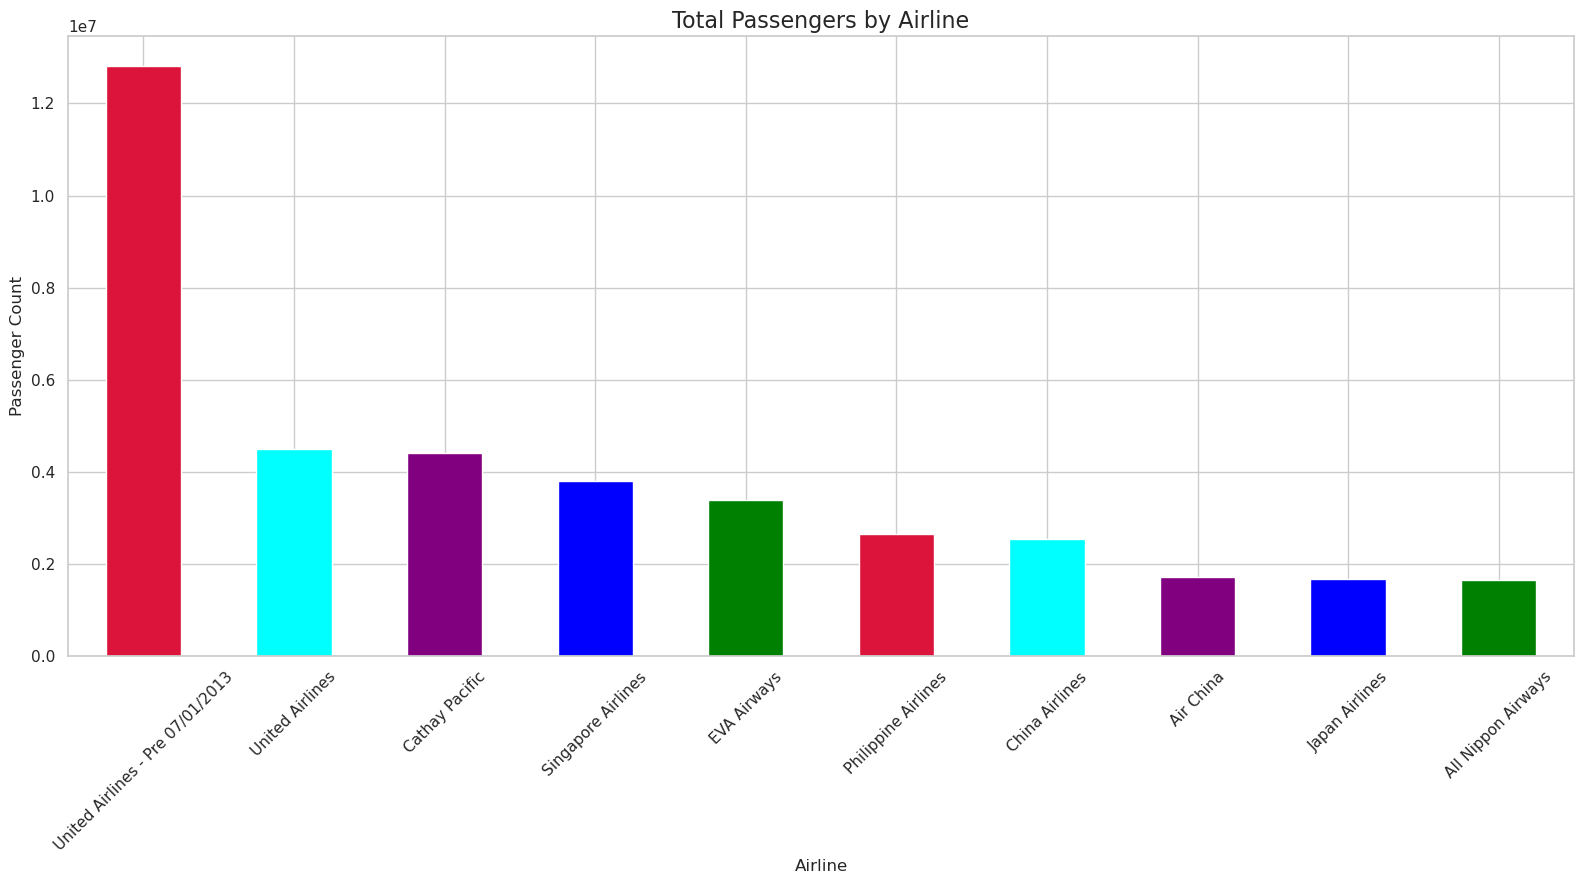

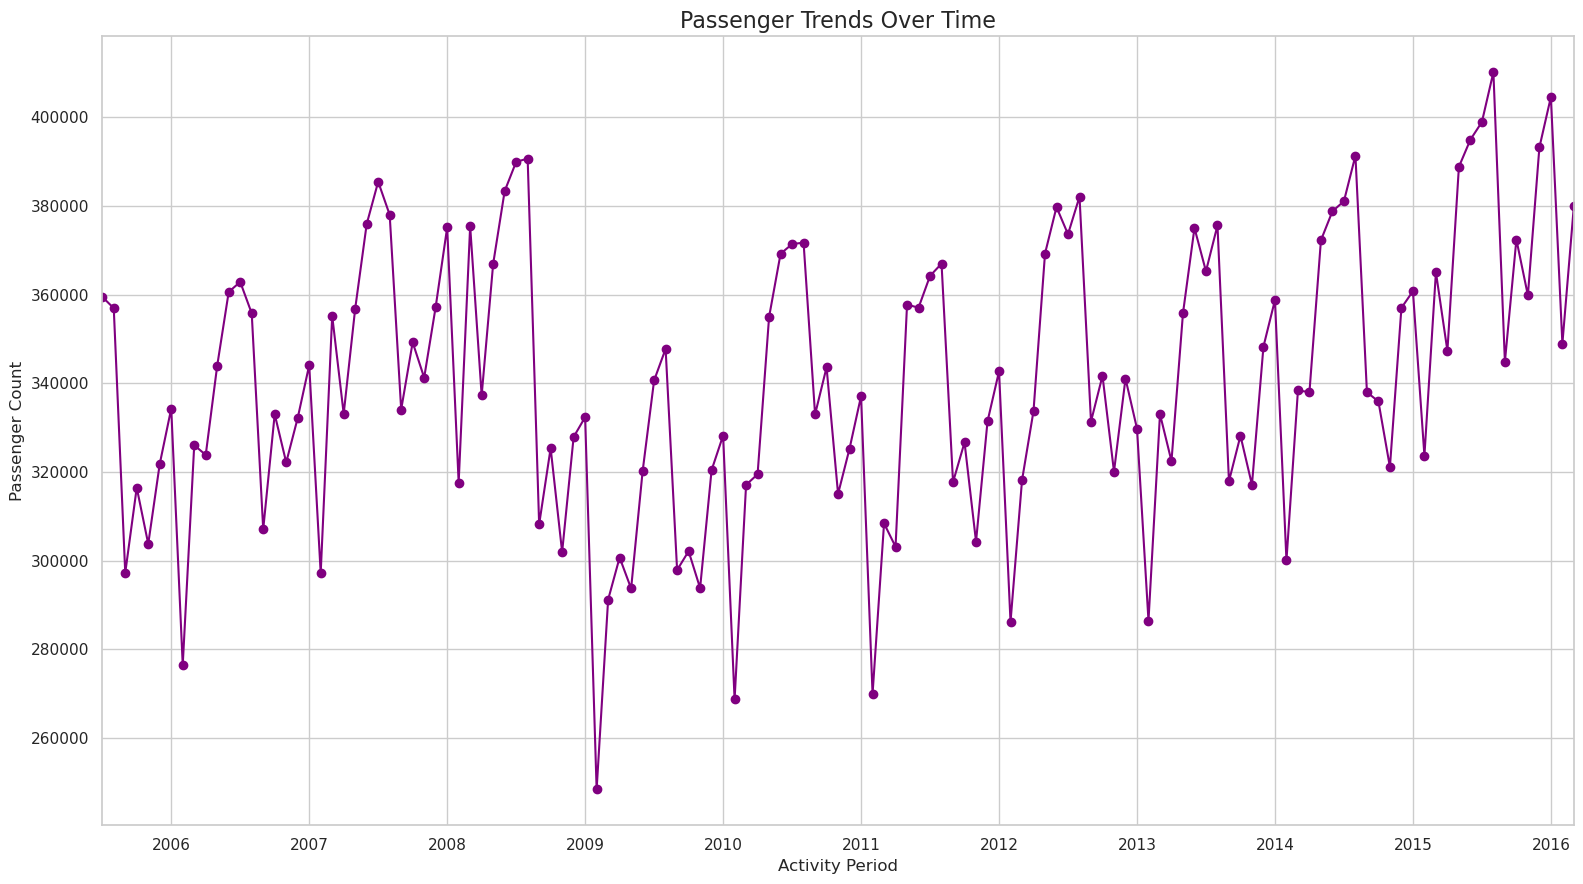

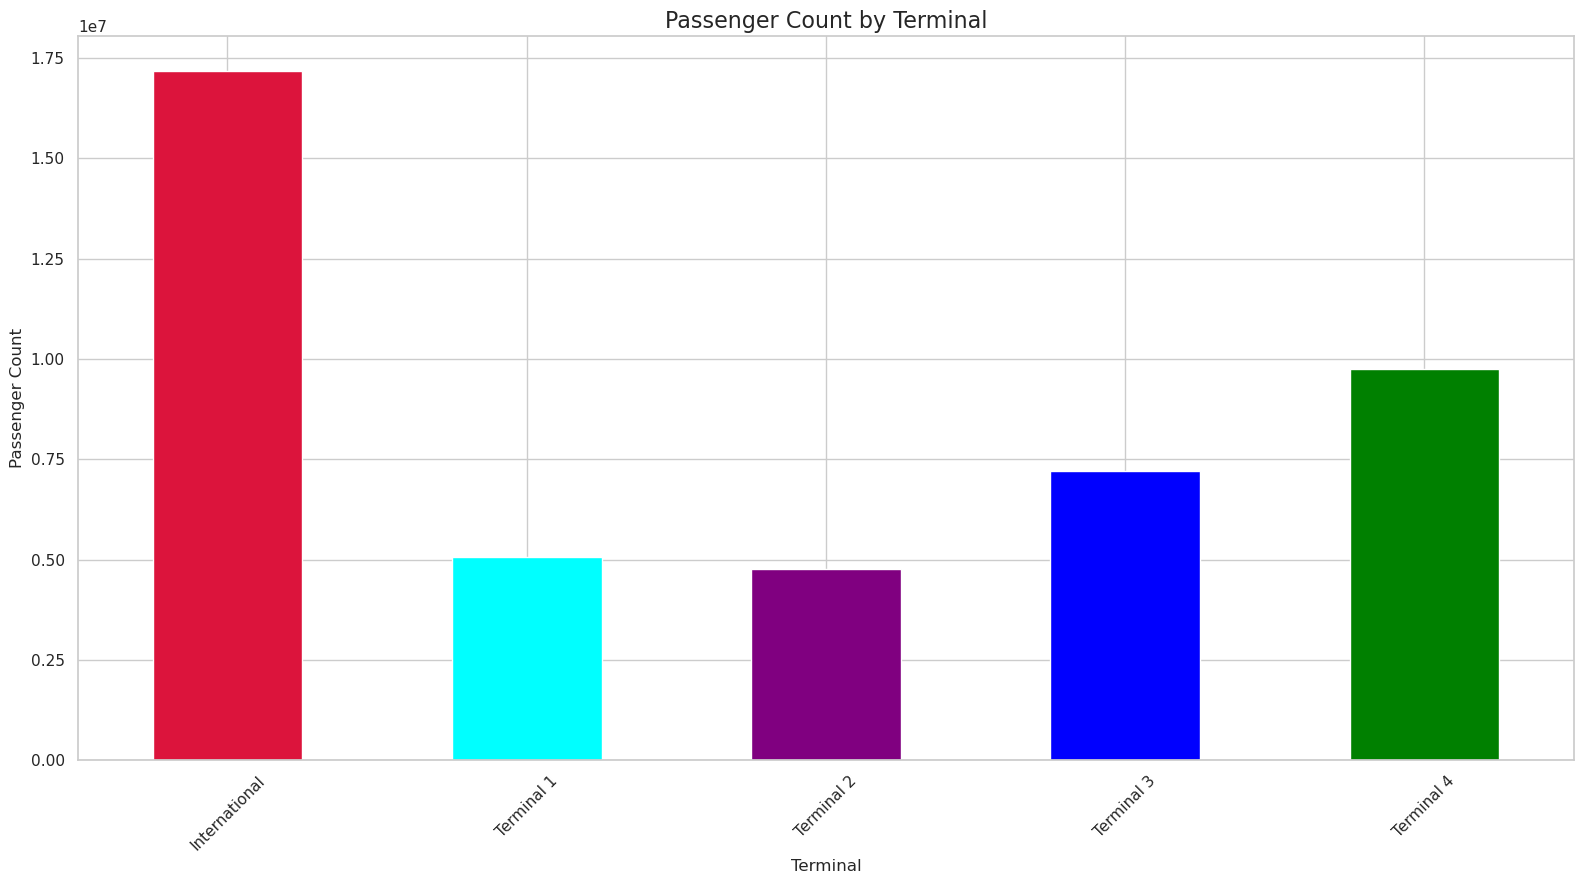

In [118]:
def main():
    data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
    
    df = clean_data(data)
    
    option = int(input())
    if option == 1: 
        region = input()
        airline_passengers, time_trends, terminal_passengers  = for_user(df, region)
        create_visualizations(airline_passengers, time_trends, terminal_passengers)
    
    else:
        airline = input()

        time_trends, Month, ticket_price, geo_summary = for_airline(df, airline)
        create_visualizations_airline(geo_summary, time_trends, Month, ticket_price)


if __name__ == "__main__":
    main()